In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
# plotのサイズを指定する
from pylab import rcParams
rcParams['figure.figsize'] = 10,5

# 10.6 回帰に正則化手法を使用する
第3章で説明した通り、過学習にに対処する手法の一つとして**正則化**があげられる。一般的なアプローチとして、以下の3つを紹介する。学習において最小化するコスト関数を重みのベクトル$w$の関数として$J(w)$と表す。

## 1. Ridge回帰
**Ridge回帰**はL2ペナルティを付与したモデルである。
$$
J(\boldsymbol{w})_{Ridge} = J(\boldsymbol{w}) + \lambda||\boldsymbol{w}||_{2}^{2}
$$
右辺の$||\boldsymbol{w}||_{2}$はL2ノルムと呼ばれるもので、$m$次元ベクトル$\boldsymbol{w}$に対して以下の式で定義される。
$$
||\boldsymbol{w}||_{2} = \sqrt{\sum_{i=1}^{m} w_{i}^2}
$$
また、ハイパーパラメータ$\lambda$は**正則化係数**と呼ばれ、正則化の強さを表すものである。最小化を考えるときに正則化項を加えたコスト関数$J(\boldsymbol{w})_{Ridge}$の$\boldsymbol{w}$についての微分を考えることがあり、その際計算を簡単にするために正則化係数を$\frac{\lambda}{2}$とすることがある。


## 2. Lasso回帰
**Lasso回帰**はL1ペナルティを付与したモデルである。
$$
J(\boldsymbol{w})_{Lasso} = J(\boldsymbol{w}) + \lambda||\boldsymbol{w}||_{1}
$$
右辺の$||\boldsymbol{w}||_{1}$はL1ノルムと呼ばれるもので、$m$次元ベクトル$w$に対して以下の式で定義される。
$$
||\boldsymbol{w}||_{1} = \sum_{i=1}^{m} |w_{i}|
$$
正則化係数$\lambda$は先ほどのRidge回帰と同じく正則化の強さを表すものである。Ridge回帰と異なる点として、以下の2点があげられる。

1. サンプル数$n$が特徴量の数$m$よりも少ない場合、L1ノルムの和は$n$までとなる。これはサンプルの行列$X$がランク落ちしていることに相当する。
2. Lasso回帰で得られる$\boldsymbol{w}$はしばしば要素として0を多く持つベクトル、つまりスパースな解となることがある。このスパース性は特徴量選択の観点から役に立つと考えられる。


## 3. Elastic Net
**Elastic Net**は前述のRidge回帰とLasso回帰の両方を合わせたような手法である。
$$
J(\boldsymbol{w})_{ElasticNet} = J(\boldsymbol{w}) + \lambda_{1}||\boldsymbol{w}||_{2}^{2} + \lambda_{2}||\boldsymbol{w}||_{1}
$$
正則化項のL2ノルムとL1ノルムを重み付けすることで、Lassoの制約を部分的に克服しているといえる。

なお、scikit-learnでは、正則化項に対する係数$\alpha$とL1・L2の比$\rho(={\rm l1\_ratio})$を用いて
$$
J(\boldsymbol{w})_{ElasticNet} = J(\boldsymbol{w}) + \alpha\left\{\rho||\boldsymbol{w}||_{1} + \frac{(1-\rho)}{2}||\boldsymbol{w}||_{2}^{2}\right\}
$$
という実装になっている。


## 捕捉
* 一般にLpノルムは以下の式で定義される。
$$
||\boldsymbol{w}||_{p} = \left({\sum_{i=1}^{m} |w_{i}|^{p}}\right)^{\frac{1}{p}}
$$
$p \rightarrow \infty$や$p \rightarrow 0$などでL${\infty}$ノルムやL0ノルムなども定義できる。

* ロジスティック回帰やサポートベクトルマシンなどでは、必ず正則化についてのパラメータを設定する。なぜならこれらは、正則化するようにはじめからアルゴリズムが設計されているからである。ロジスティック回帰とサポートベクトルマシンはどちらも**2値分類**でよく使われるアルゴリズムであるが、この2者の違いは学習に用いるコスト関数と正則化項の選び方が違っているだけである。ロジスティック回帰ではロジスティック損失関数とL1正則化(L2の場合もある)、サポートベクトルマシンはヒンジ損失関数とL2正則化を用いている。

In [3]:
# 使用例
from sklearn.linear_model import Ridge, Lasso, ElasticNet

ridge = Ridge(alpha=1.0)
lasso = Lasso(alpha=1.0)
elanet = ElasticNet(alpha=1.0, l1_ratio=0.5)

# 10.7 多項式回帰：線形回帰モデルから曲線を見出す
線形回帰モデルよりもより次数の高い多項式の項を追加したモデルである**多項式回帰**について説明する。多項式の次数を$d$とするとき、目的変数$y$を説明変数$x$で以下のようにモデリングする。
$$
y = w_{0} + w_{1}x + w_{2}x^{2} + \cdots + w_{d}x^{d}
$$
以下に示すコードで、多項式回帰の流れを確認する。

In [4]:
import numpy as np

X = np.array([258.0, 270.0, 294.0, 320.0, 342.0, 368.0, 396.0, 446.0, 480.0, 586.0])[:, np.newaxis]
y = np.array([236.4, 234.4, 252.8, 298.6, 314.2, 342.2, 360.8, 368.0, 391.2, 390.8])

In [5]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# 線形回帰と多項式回帰で比較する
lr = LinearRegression()
pr = LinearRegression()

# 今回、多項式回帰は2次でモデリング
quadratic = PolynomialFeatures(degree=2)
X_quad = quadratic.fit_transform(X)

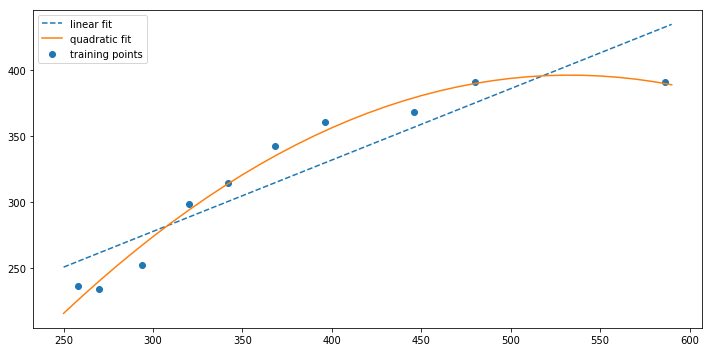

In [6]:
# 線形回帰のfitting
lr.fit(X, y)
X_fit = np.arange(250, 600, 10)[:, np.newaxis]
y_lin_fit = lr.predict(X_fit)

# 多項式回帰のfitting
pr.fit(X_quad, y)
y_quad_fit = pr.predict(quadratic.fit_transform(X_fit))

# plotする
plt.scatter(X, y, label='training points')
plt.plot(X_fit, y_lin_fit, label='linear fit', linestyle='--')
plt.plot(X_fit, y_quad_fit, label='quadratic fit')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

In [7]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# 平均二乗誤差と決定係数をそれぞれ確認
y_lin_pred = lr.predict(X)
y_quad_pred = pr.predict(X_quad)

print('Training MSE linear: %.3f, quadratic: %.3f' % (
        mean_squared_error(y, y_lin_pred),
        mean_squared_error(y, y_quad_pred)))
print('Training R^2 linear: %.3f, quadratic: %.3f' % (
        r2_score(y, y_lin_pred),
        r2_score(y, y_quad_pred)))

Training MSE linear: 569.780, quadratic: 61.330
Training R^2 linear: 0.832, quadratic: 0.982


## Housingデータセットで非線形関係をモデル化する
Housingデータセットについて、MEDV(住宅価格の中央値)とLSTAT(低所得者の割合)の関係を線形回帰モデルおよび多項式回帰でモデリングし、結果を比較する。多項式回帰は2次と3次でモデリングする。

In [8]:
import pandas as pd

# Housingデータセットの読み込み
df = pd.read_csv('https://raw.githubusercontent.com/rasbt/'
                 'python-machine-learning-book-2nd-edition'
                 '/master/code/ch10/housing.data.txt',
                 header=None,
                 sep='\s+')
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 
              'NOX', 'RM', 'AGE', 'DIS', 'RAD', 
              'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

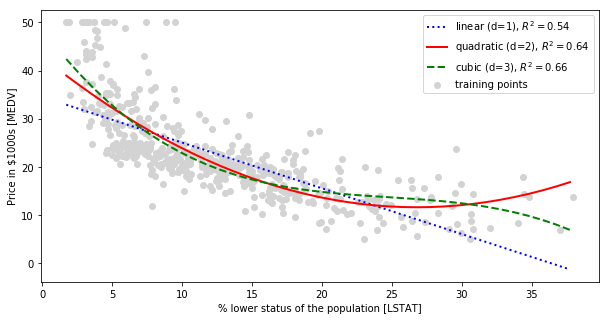

In [9]:
# 必要な列のみ抽出
X = df[['LSTAT']].values
y = df['MEDV'].values

regr = LinearRegression()

# 2次および3次の特徴量を作成
quadratic = PolynomialFeatures(degree=2)
cubic = PolynomialFeatures(degree=3)
X_quad = quadratic.fit_transform(X)
X_cubic = cubic.fit_transform(X)

# 特徴量の学習、予測、決定係数の計算
X_fit = np.arange(X.min(), X.max(), 1)[:, np.newaxis]
regr = regr.fit(X, y)
y_lin_fit = regr.predict(X_fit)
linear_r2 = r2_score(y, regr.predict(X))

# 2次の特徴量の学習、予測、決定係数の計算
regr = regr.fit(X_quad, y)
y_quad_fit = regr.predict(quadratic.fit_transform(X_fit))
quadratic_r2 = r2_score(y, regr.predict(X_quad))

# 3次の特徴量の学習、予測、決定係数の計算
regr = regr.fit(X_cubic, y)
y_cubic_fit = regr.predict(cubic.fit_transform(X_fit))
cubic_r2 = r2_score(y, regr.predict(X_cubic))

# plotする
plt.scatter(X, y, label='training points', color='lightgray')

plt.plot(X_fit, y_lin_fit, 
         label='linear (d=1), $R^2=%.2f$' % linear_r2, 
         color='blue', 
         lw=2, 
         linestyle=':')

plt.plot(X_fit, y_quad_fit, 
         label='quadratic (d=2), $R^2=%.2f$' % quadratic_r2,
         color='red', 
         lw=2,
         linestyle='-')

plt.plot(X_fit, y_cubic_fit, 
         label='cubic (d=3), $R^2=%.2f$' % cubic_r2,
         color='green', 
         lw=2, 
         linestyle='--')

plt.xlabel('% lower status of the population [LSTAT]')
plt.ylabel('Price in $1000s [MEDV]')
plt.legend(loc='upper right')
plt.show()

結果のグラフから、3次の多項式モデルは他のモデルよりもMEDVとLSTATの関係をうまく捕捉していると考えられる。ただし、一般にモデルを複雑にすればするほど、過学習の可能性が高まるということには注意しなければならない。実際には汎化性能を推定するためにテストデータセットによるモデルの評価が必要になる。

また、多項式回帰が非線形関係のモデリングの最良の選択とも限らない。今回のHousingデータでは、指数関数によってモデリングしてみるとどうだろうか。つまり、2つの特徴量間に以下のような関係があると仮定するのである。
$$
{\rm (MEDV)} = a^{w_{0}+w_{1}{\rm (LSTAT)}}
$$
特に、LSTATの対数をとり、MEDVの平方根をとる変数変換を考えると、以下の線形回帰に持ち込める。
$$
\log {\rm (MEDV)} = w'_{0}+w'_{1}{\rm (LSTAT)}
$$
このモデリングについて見てみよう。

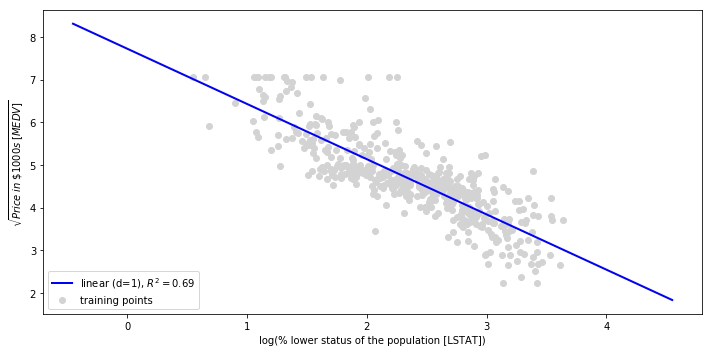

In [10]:
X = df[['LSTAT']].values
y = df['MEDV'].values

# 特徴量を変換する
X_log = np.log(X)
y_sqrt = np.sqrt(y)

# 特徴量の学習、予測、決定係数の計算
X_fit = np.arange(X_log.min()-1, X_log.max()+1, 1)[:, np.newaxis]
regr = regr.fit(X_log, y_sqrt)
y_lin_fit = regr.predict(X_fit)
linear_r2 = r2_score(y_sqrt, regr.predict(X_log))

# plotする
plt.scatter(X_log, y_sqrt, label='training points', color='lightgray')

plt.plot(X_fit, y_lin_fit, 
         label='linear (d=1), $R^2=%.2f$' % linear_r2, 
         color='blue', 
         lw=2)

plt.xlabel('log(% lower status of the population [LSTAT])')
plt.ylabel('$\sqrt{Price \; in \; \$1000s \; [MEDV]}$')
plt.legend(loc='lower left')

plt.tight_layout()
plt.show()

先ほどの多項式回帰よりも当てはまりの良い決定係数になっていることが確認できる。

## ランダムフォレストを使って非線形関係に対処する
**ランダムフォレスト**は複数の決定木からなるアンサンブルを表す。決定木の性質を考えると、ランダムフォレストは前述の回帰モデルとは対照的に、区分線形関数の和として考えられる。ここで、情報利得と不純度、決定木回帰とランダムフォレスト回帰について確認する。

### 情報利得と不純度
決定木アルゴリズムでは入力された特徴量から1つ選び、その特徴量についてある閾値によってデータを2つに分割することを繰り返して分類する。では、その際にどのように分割する特徴量と閾値を選ぶのか？

まず、次式で定義される**情報利得**$IG$が最大となる特徴量を選ぶ。
$$
IG(D_{p},f) = I(D_{p}) - \sum_{j=1}^{m}\frac{N_{j}}{N_{p}}I(D_{j})
$$
ここで、$f$は分割を行う特徴量、$D_{p}$は親ノードのデータセット、$D_{j}$は$j$番目の子ノードのデータセットである。また、$I$は**不純度**と呼ばれる指標であり、これについては後で説明する。大抵の実装では、親ノードの分割数$m$は計算量を減らすために二文決定木を採用している。
$$
IG(D_{p},f) = I(D_{p}) - \frac{N_{left}}{N_{p}}I(D_{left}) -\frac{N_{right}}{N_{p}}I(D_{right})
$$
この二分決定木で使われる不純度として、以下の3種類が主である。ノード$t$に含まれるクラス$i~(i=1,\cdots ,c)$のサンプルの割合を$p(i|t)$としてそれぞれ以下の式で定義される。

1. **ジニ不純度**
$$
I_{G}(t) = 1-\sum_{i=1}^{c}p(i|t)^2
$$
2. **エントロピー**
$$
I_{H}(t) = -\sum_{i=1}^{c}p(i|t)\log_{2}p(i|t)
$$
3. 分類誤差
$$
I_{E}(t) = 1-\max\{p(i|t)\}
$$

どの定義でも、「分割後の不純度を最小にする」ような分割の特徴量を選択できる。不純度は直感的に言うとデータセットの中の異なるクラスがどの程度の割合で混ざっているかを表す指標で、この最小化はクラス分類という意味では自然に思える。

今回の決定木回帰では連続値の変数に適した指標である平均二乗誤差を採用する。この場合の平均二乗誤差は**分割後のノード分散**を表していて、その意味では決定木回帰は分散現象を分割条件にしていると解釈できる。

### 決定木回帰
先ほどのMEDVとLSTATについて決定木回帰によってモデリングしてみる。

In [11]:
# 散布図と回帰直線を同時にplotする関数
def lin_regplot(X, y, model):
    plt.scatter(X, y, c='steelblue', edgecolor='white', s=70)
    plt.plot(X, model.predict(X), color='black', lw=2)    
    return 

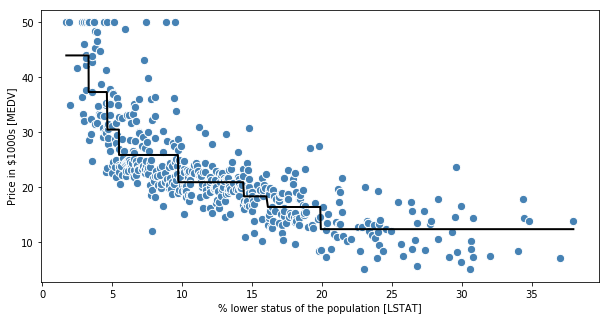

In [12]:
from sklearn.tree import DecisionTreeRegressor

X = df[['LSTAT']].values
y = df['MEDV'].values

# fitting
tree = DecisionTreeRegressor(max_depth=3) # max_depthは決定木の深さ
tree.fit(X, y)

sort_idx = X.flatten().argsort()

# plotする
lin_regplot(X[sort_idx], y[sort_idx], tree)
plt.xlabel('% lower status of the population [LSTAT]')
plt.ylabel('Price in $1000s [MEDV]')
plt.show()

データの傾向の捕捉はできていると思われる。決定木の問題点として、max_depthの値を大きくしすぎると過学習しやすくなるので適切な値を見つける必要があり、また予測値が連続性も微分可能性も有していないため扱いにくいという点があげられる。

### ランダムフォレスト回帰
ランダムフォレスト回帰は決定木回帰よりも汎化性能が高い手法である。ランダムフォレストはパラメータとして、アンサンブルする決定木の個数のみを実験すればよい。ただし、個々の決定木では平均二乗誤差を分割の条件とする。

Housingデータセットの全ての特徴量を使用して、60%をtrainとして学習し、残りの40%をtestとしてその汎化性能を評価してみる。

In [13]:
from sklearn.model_selection import train_test_split

X = df.iloc[:, :-1].values
y = df['MEDV'].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=1)

In [14]:
from sklearn.ensemble import RandomForestRegressor

# インスタンス化、fittingおよびtestに対して予測
forest = RandomForestRegressor(n_estimators=1000, 
                               criterion='mse', 
                               random_state=1, 
                               n_jobs=-1)
forest.fit(X_train, y_train)
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)

# train, testに対して平均二乗誤差および決定係数をそれぞれ確認
print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

/Users/irieyoshiki/.pyenv/versions/anaconda3-5.3.0/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


MSE train: 1.642, test: 11.052
R^2 train: 0.979, test: 0.878


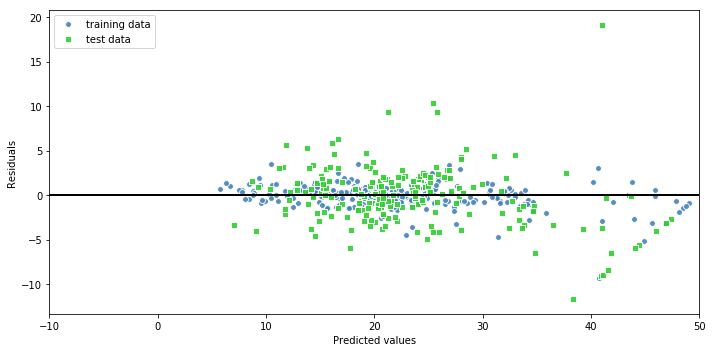

In [15]:
# 残差についてplotしてみる
plt.scatter(y_train_pred,  
            y_train_pred - y_train, 
            c='steelblue',
            edgecolor='white',
            marker='o', 
            s=35,
            alpha=0.9,
            label='training data')
plt.scatter(y_test_pred,  
            y_test_pred - y_test, 
            c='limegreen',
            edgecolor='white',
            marker='s', 
            s=35,
            alpha=0.9,
            label='test data')

plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color='black')
plt.xlim([-10, 50])
plt.tight_layout()

plt.show()

この残差プロットから、残差は原点の中心に完全にランダムに分布しているようには見えず、このモデルでは情報を完全に捕捉できないことを示唆している。一般に、予測値の誤差と説明変数に含まれている情報との間には関連性はないはずであり、予測値の誤差にパターンが見られると言うのは残差プロット自体に予測値の情報が含まれていることを意味している。その理由として、そのような説明情報が残差に漏れ出していることなどがあげられる。

このような残差の非ランダム性に対する普遍的アプローチというのは存在せず、ハイパーパラメータのチューニング、より複雑なモデルの適用、外れ値を取り除く、変数の追加などによってモデルを改善する必要がある。